In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.signal

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
ls 'gdrive/My Drive/left_fist.npy'

'gdrive/My Drive/left_fist.npy'


In [0]:
left_fist = np.load('gdrive/My Drive/left_fist.npy')
right_fist = np.load('gdrive/My Drive/right_fist.npy')
both_fist = np.load('gdrive/My Drive/both_fist.npy')
both_feet = np.load('gdrive/My Drive/both_feet.npy')

In [6]:
left_fist = np.array(left_fist[:530])
right_fist = np.array(right_fist[:530])
both_fist = np.array(both_fist)
both_feet = np.array(both_feet)
print(left_fist.shape)
print(right_fist.shape)
print(both_fist.shape)
print(both_feet.shape)

(530, 64, 113)
(530, 64, 113)
(530, 64, 113)
(530, 64, 113)


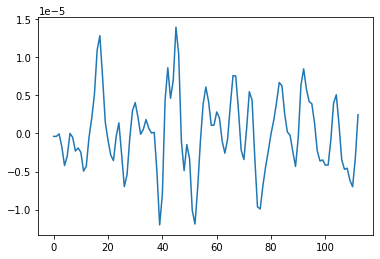

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


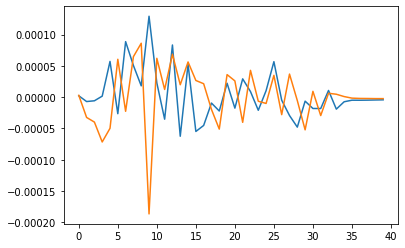

In [7]:
#plt.plot(left_fist[0][0])
#plt.show()
plt.plot(right_fist[0][0])
plt.show()
#plt.plot(np.fft.fft(both_fist[0][0])[:40])
plt.plot(np.fft.fft(left_fist[0][0])[:40])
plt.plot(np.fft.fft(right_fist[0][0])[:40])

#plt.plot(both_fist[0][0])
#plt.show()
#plt.plot(both_feet[0][0])

/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  .format(nperseg, input_length))
/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  .format(nperseg, input_length))


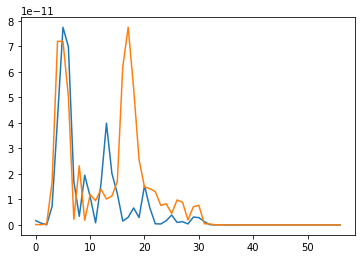

In [8]:
plt.plot(scipy.signal.welch(left_fist)[1][90][8])
plt.plot(scipy.signal.welch(right_fist)[1][90][8])
#plt.plot(both_fist[0][0])
#plt.plot(both_feet[0][0])

In [9]:
print(abs(np.sum(left_fist[0][0] - right_fist[0][0])))
print(abs(np.sum(left_fist[0][0] - both_fist[0][0])))
print(abs(np.sum(left_fist[0][0] - both_feet[0][0])))
print(abs(np.sum(both_feet[0][0] - both_fist[0][0])))

6.853359500868575e-07
1.6039158473338503e-05
3.0591367277883825e-05
1.4552208804545327e-05


In [0]:
events = np.zeros((2120,4))
ones = np.ones((530,))

In [0]:
# left fist
events[:530,0] = events[:530,0] + ones
# right fist
events[530:1060,1] = events[530:1060,1] + ones
# both fist 
events[1060:1590,2] = events[1060:1590,2] + ones
# both feet
events[1590:,3] = events[1590:,3] + ones

In [0]:
def preprocessing(data):
    mean = np.mean(data, axis = 0)    
    var = np.var(data, axis = 0)
    data = (data - mean)/var
    return data
#data_array = preprocessing(data)

In [13]:
# fast fourier transform
a = np.fft.fft(left_fist)[:,:,:40]
a.shape

(530, 64, 40)

In [0]:
f_left_fist = np.fft.fft(left_fist)[:,:,:40].real
f_left_fist = preprocessing(f_left_fist).reshape((530,2560))
f_right_fist = np.fft.fft(right_fist)[:,:,:40].real
f_right_fist = preprocessing(f_right_fist).reshape((530,2560))
f_both_fist = np.fft.fft(both_fist)[:,:,:40].real
f_both_fist = preprocessing(f_both_fist).reshape((530,2560))
f_both_feet = np.fft.fft(both_feet)[:,:,:40].real
f_both_feet = preprocessing(f_both_feet).reshape((530,2560))

In [15]:
print(f_left_fist.shape)
print(f_right_fist.shape)
print(f_both_fist.shape)
print(f_both_feet.shape)

(530, 2560)
(530, 2560)
(530, 2560)
(530, 2560)


In [16]:
fft_data = np.concatenate((f_left_fist, f_right_fist, f_both_fist, f_both_feet), axis = 0)
fft_data.shape

(2120, 2560)

In [17]:
new_fft_data = fft_data.reshape((2120, 2560, 1))
events.shape

(2120, 4)

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, Conv2D, LSTM
from tensorflow.keras.layers import MaxPooling1D, AveragePooling2D
from tensorflow.keras.layers import LeakyReLU, BatchNormalization

In [19]:
x_train, x_test, y_train, y_test = train_test_split(new_fft_data, events, test_size=0.3, random_state=42)
x_train.shape

(1484, 2560, 1)

In [0]:
def create_model():
    # create model
    model = Sequential()
    model.add(Conv1D(filters=50, kernel_size=11, activation='relu', input_shape=(2560,1)))
    model.add(Conv1D(filters=15, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(150, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(120, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(15, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(4, activation='softmax'))


    # Compile model
    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
    return model

In [21]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2550, 50)          600       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2548, 15)          2265      
_________________________________________________________________
dropout (Dropout)            (None, 2548, 15)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1274, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 19110)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1911100   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0

In [22]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=100)

Epoch 1/100
47/47 [==============================] - 8s 170ms/step - loss: 1.6867 - acc: 0.2520 - val_loss: 1.3974 - val_acc: 0.2421
Epoch 2/100
47/47 [==============================] - 8s 162ms/step - loss: 1.5514 - acc: 0.2662 - val_loss: 1.4027 - val_acc: 0.2264
Epoch 3/100
47/47 [==============================] - 8s 162ms/step - loss: 1.4838 - acc: 0.2621 - val_loss: 1.4044 - val_acc: 0.2704
Epoch 4/100
47/47 [==============================] - 8s 162ms/step - loss: 1.4648 - acc: 0.2662 - val_loss: 1.4076 - val_acc: 0.2327
Epoch 5/100
47/47 [==============================] - 8s 161ms/step - loss: 1.4410 - acc: 0.2534 - val_loss: 1.4020 - val_acc: 0.2516
Epoch 6/100
47/47 [==============================] - 8s 162ms/step - loss: 1.4249 - acc: 0.2668 - val_loss: 1.4084 - val_acc: 0.2469
Epoch 7/100
47/47 [==============================] - 8s 161ms/step - loss: 1.4225 - acc: 0.2540 - val_loss: 1.3991 - val_acc: 0.2579
Epoch 8/100
47/47 [==============================] - 8s 161ms/step - 

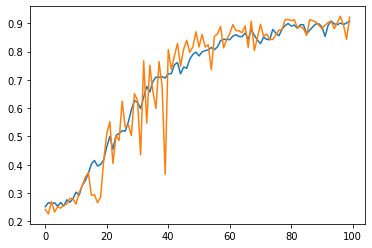

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

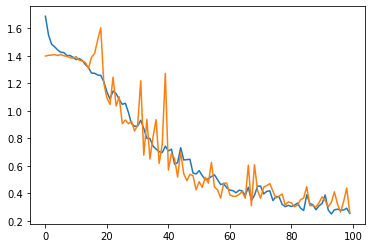

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [27]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf
def result(x_test, y_test):
  y_pred = model.predict(x_test)
  y_classes = y_pred.argmax(axis=-1)
  label =  tf.keras.utils.to_categorical(np.asarray(y_classes)) 
  matrix = confusion_matrix(y_test.argmax(axis=1), label.argmax(axis=1))
  FP = np.sum(matrix.sum(axis=0) - np.diag(matrix))/4  
  FN = np.sum(matrix.sum(axis=1) - np.diag(matrix))/4
  TP = np.sum(np.diag(matrix))/4
  TN = np.sum(matrix.sum() - (FP + FN + TP))/4
  data = []
  # Overall accuracy
  accuracy = (TP+TN)/(TP+FP+FN+TN)
  data.append(accuracy)
  #Error
  error = (FP + FN)/(TP + TN + FN + FP)
  data.append(error)
  # Sensitivity, hit rate, recall, or true positive rate
  sensitivity = TP/(TP+FN)  
  data.append(sensitivity)
  # Specificity or true negative rate
  specificity = TN/(TN+FP)
  data.append(specificity)
  # Precision or positive predictive value
  precision = TP/(TP+FP)
  data.append(precision)
  # Fall out or false positive rate
  false_positive_rate = FP/(FP+TN)
  data.append(false_positive_rate)

  #F-score
  f_score = (2*(precision *sensitivity))/(precision  + sensitivity)
  data.append(f_score)
  # False discovery rate
  FDR = FP/(TP+FP)
  data.append(FDR)
  # Negative predictive value
  NPV = TN/(TN+FN)
  data.append(NPV)
  return data
test_results = result(x_test, y_test)
test_results

[0.9130812690134724,
 0.0869187309865276,
 0.9213836477987422,
 0.902818270165209,
 0.9213836477987422,
 0.09718172983479106,
 0.9213836477987422,
 0.07861635220125786,
 0.902818270165209]

In [28]:
train_results = result(x_train, y_train)
train_results

[0.995387276571209,
 0.0046127234287910825,
 0.9959568733153639,
 0.9946308724832215,
 0.9959568733153639,
 0.005369127516778523,
 0.9959568733153639,
 0.004043126684636119,
 0.9946308724832215]